# Problem Statement:
                Predict the Price based on Charges of Medical Cost Prediction.

### Import the Required Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data:

In [2]:
df=pd.read_csv(r'\Users\LENOVO\Downloads\insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.shape

(1338, 7)

In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
df.duplicated().sum()

1

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Preparation:
#### 1. Identifying the inputs(X) and output(y).
#### 2. Split into train and test.
#### 3. Preprocess the training data.
#### 4. Preprocess the test data.

In [6]:
# Identifying the inputs (X) and output (y)

y = df['charges']

X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

In [7]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


### Data Preprocessing: Train_Test_Split

In [9]:
# split into train and test for 70 &30 percent

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [10]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(936, 6) (936,)
(402, 6) (402,)


## Separarting Categorical and Numerical Columns:

In [11]:
X_train.head()

,age,sex,bmi,children,smoker,region
966,51,male,24.795,2,yes,northwest
522,51,female,33.915,0,no,northeast
155,44,male,39.520,0,no,northwest
671,29,female,31.160,0,no,northeast
1173,38,male,29.260,2,no,northwest


In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 966 to 792
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       936 non-null    int64  
 1   sex       936 non-null    object 
 2   bmi       936 non-null    float64
 3   children  936 non-null    int64  
 4   smoker    936 non-null    object 
 5   region    936 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 51.2+ KB


In [13]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,sex,smoker,region
966,male,yes,northwest
522,female,no,northeast
155,male,no,northwest
671,female,no,northeast
1173,male,no,northwest


In [14]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,age,bmi,children
966,51,24.795,2
522,51,33.915,0
155,44,39.520,0
671,29,31.160,0
1173,38,29.260,2


## Scaling the Numerical Features:

In [15]:
X_train_num.head()

,age,bmi,children
966,51,24.795,2
522,51,33.915,0
155,44,39.520,0
671,29,31.160,0
1173,38,29.260,2


In [16]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,age,bmi,children
966,0.847399,-0.966302,0.744470
522,0.847399,0.502693,-0.914635
155,0.349938,1.405512,-0.914635
671,-0.716049,0.058934,-0.914635
1173,-0.076457,-0.247106,0.744470


In [17]:
X_train_num.describe()

,age,bmi,children
count,936.000000,936.000000,936.000000
mean,39.075855,30.794119,1.102564
std,14.078983,6.211649,1.206114
min,18.000000,15.960000,0.000000
25%,26.000000,26.272500,0.000000
50%,39.000000,30.500000,1.000000
75%,51.000000,34.992500,2.000000
max,64.000000,53.130000,5.000000


In [18]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [39.0758547  30.79411859  1.1025641 ]
Std of each column: [14.07146041  6.20832992  1.20546913]


## Applying OneHotEncoding on Categorical Columns:

In [19]:
X_train_cat['sex'].value_counts(normalize=True)

female    0.502137
male      0.497863
Name: sex, dtype: float64

In [20]:
X_train_cat['smoker'].value_counts(normalize=True)

no     0.805556
yes    0.194444
Name: smoker, dtype: float64

In [21]:
X_train_cat['region'].value_counts(normalize=True)

southeast    0.282051
northwest    0.244658
southwest    0.242521
northeast    0.230769
Name: region, dtype: float64

In [22]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
966,1.0,1.0,1.0,0.0,0.0
522,0.0,0.0,0.0,0.0,0.0
155,1.0,0.0,1.0,0.0,0.0
671,0.0,0.0,0.0,0.0,0.0
1173,1.0,0.0,1.0,0.0,0.0


In [23]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
966,0.847399,-0.966302,0.744470,1.0,1.0,1.0,0.0,0.0
522,0.847399,0.502693,-0.914635,0.0,0.0,0.0,0.0,0.0
155,0.349938,1.405512,-0.914635,1.0,0.0,1.0,0.0,0.0
671,-0.716049,0.058934,-0.914635,0.0,0.0,0.0,0.0,0.0
1173,-0.076457,-0.247106,0.744470,1.0,0.0,1.0,0.0,0.0


## Preparing the Test Data:

In [24]:
X_test.head()

,age,sex,bmi,children,smoker,region
12,23,male,34.400,0,no,southwest
306,28,female,27.500,2,no,southwest
318,44,female,27.645,0,no,northwest
815,20,female,31.460,0,no,southeast
157,18,male,25.175,0,yes,northeast


In [25]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 12 to 1164
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       402 non-null    int64  
 1   sex       402 non-null    object 
 2   bmi       402 non-null    float64
 3   children  402 non-null    int64  
 4   smoker    402 non-null    object 
 5   region    402 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 22.0+ KB


In [26]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,sex,smoker,region
12,male,no,southwest
306,female,no,southwest
318,female,no,northwest
815,female,no,southeast
157,male,yes,northeast


In [27]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,age,bmi,children
12,23,34.400,0
306,28,27.500,2
318,44,27.645,0
815,20,31.460,0
157,18,25.175,0


In [28]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_test_cat_ohe = pd.DataFrame(encoder.fit_transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
12,1.0,0.0,0.0,0.0,1.0
306,0.0,0.0,0.0,0.0,1.0
318,0.0,0.0,1.0,0.0,0.0
815,0.0,0.0,0.0,1.0,0.0
157,1.0,1.0,0.0,0.0,0.0


In [29]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,age,bmi,children
12,-1.142444,0.580813,-0.914635
306,-0.787115,-0.530597,0.744470
318,0.349938,-0.507241,-0.914635
815,-1.355641,0.107256,-0.914635
157,-1.497773,-0.905093,-0.914635


In [30]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
12,-1.142444,0.580813,-0.914635,1.0,0.0,0.0,0.0,1.0
306,-0.787115,-0.530597,0.744470,0.0,0.0,0.0,0.0,1.0
318,0.349938,-0.507241,-0.914635,0.0,0.0,1.0,0.0,0.0
815,-1.355641,0.107256,-0.914635,0.0,0.0,0.0,1.0,0.0
157,-1.497773,-0.905093,-0.914635,1.0,1.0,0.0,0.0,0.0


## Linear Regression:

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [32]:
y_test_pred = regressor.predict(X_test_transformed)

In [33]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
12,1826.84300,4085.112362
306,20177.67113,4331.248681
318,7421.19455,8435.083234
815,1877.92940,3113.711050
157,15518.18025,25704.594920


<AxesSubplot:xlabel='charges', ylabel='Count'>

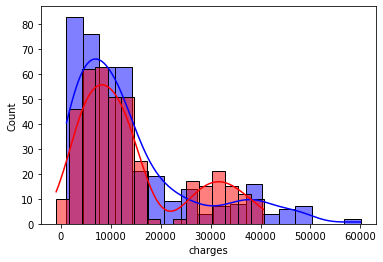

In [36]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True)

In [35]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  3943.237703947304
Mean Squared Error:  32345536.74852544
Root Mean Squared Error:  5687.313667147737


## KNN Regression:

In [37]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [38]:
y_test_pred = regressor.predict(X_test_transformed)

In [39]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4185.206192833333
Mean Squared Error:  45219615.593549214
Root Mean Squared Error:  6724.553189138235


<AxesSubplot:xlabel='charges', ylabel='Count'>

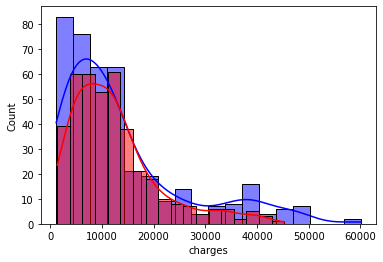

In [40]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True)

## Support Vector Regression:

In [46]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_transformed, y_train)

SVR()

In [47]:
y_test_pred = regressor.predict(X_test_transformed)

In [48]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  8313.089770167451
Mean Squared Error:  163045961.87207848
Root Mean Squared Error:  12768.9452137629


<AxesSubplot:xlabel='charges', ylabel='Count'>

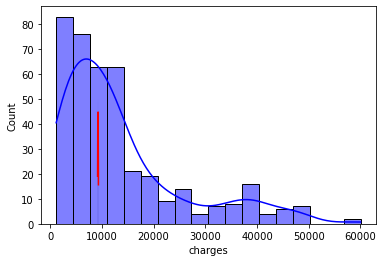

In [49]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True)

## Decision Tree Regression:

In [41]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [42]:
y_test_pred = regressor.predict(X_test_transformed)

In [43]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  3053.7920901840794
Mean Squared Error:  41553430.94169893
Root Mean Squared Error:  6446.1950747475


<AxesSubplot:xlabel='charges', ylabel='Count'>

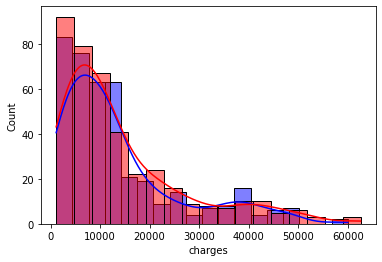

In [44]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True)

## Random Forest Regression:

In [50]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [51]:
y_test_pred = regressor.predict(X_test_transformed)

In [52]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2858.9834888560945
Mean Squared Error:  21694834.380999964
Root Mean Squared Error:  4657.771396386899


<AxesSubplot:xlabel='charges', ylabel='Count'>

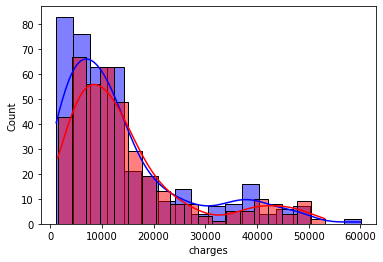

In [53]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True)

## Gradient Boost Decision Tree Regression:

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
GBDT_regression = GradientBoostingRegressor()
GBDT_regression.fit(X_train_transformed, y_train)

GradientBoostingRegressor()

In [56]:
y_test_pred = GBDT_regression.predict(X_test_transformed)

In [57]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2472.4197081021725
Mean Squared Error:  16250148.47616951
Root Mean Squared Error:  4031.147290309486


<AxesSubplot:xlabel='charges', ylabel='Count'>

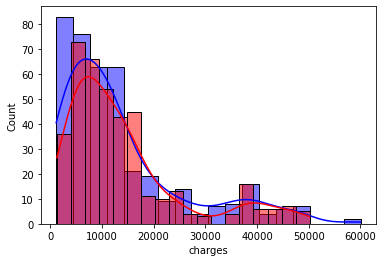

In [58]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', kde=True)

## Conclusion:
#### 1.Linear Regression---Mean Absolute Error:  3943.237703947304.
#### 2.KNN---Mean Absolute Error:4185.206192833333.
#### 3.SVR---Mean Absolute Error:  8313.089770167451.
#### 4.Decision Tree Regression---Mean Absolute Error:  3053.7920901840794.
#### 5.Random Forest Tree Regression---Mean Absolute Error:  2858.9834888560945
#### 6.GBDT---Mean Absolute Error:  2472.4197081021725.
##### Gradient Boosting Decision Tree Regression is the best model for Medical Cost Prediction.
##### Because it gives us very least mean absolute error value.